# Git CheatSheet
> 안 쓰면 잊어버리는, git 주요 조작법들을 정리

- badges: false
- comments: true
- author: limyj0708
- categories: [git]
- sticky_rank: 2
- toc: true

## 1. 기존 디렉토리를 Git 저장소로 만들기
- 원하는 폴더로 이동 후 `git init`

## 2. 기존 저장소를 Clone 하기
  - fastpage repository를 clone 한다면
  - `git clone https://github.com/limyj0708/fastpages.git`

## 3. 수정과 저장

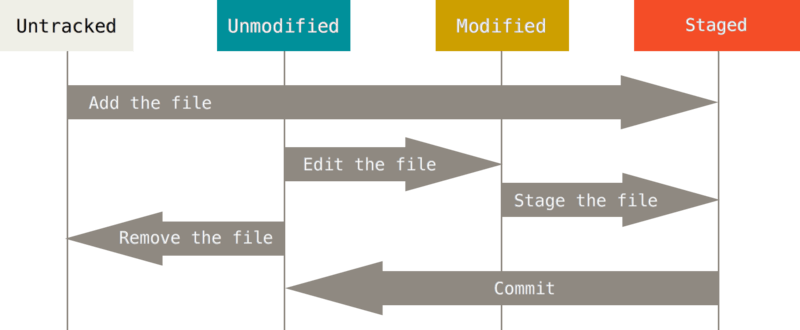

### 3-1. 상태 확인
  - `git status`
  
```PowerShell
  PS C:\Users\limyj0708\fastpages> git status
On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        _notebooks/2022-06-13-git_cheatsheet.ipynb

nothing added to commit but untracked files present (use "git add" to track)
```
  
  - 2022-06-13-git_cheatsheet.ipynb 파일이 untracked 상태
  - Git은 Untracked 파일을 아직 스냅샷(커밋)에 넣어지지 않은 파일이라고 본다. 파일이 Tracked 상태가 되기 전까지는 Git은 절대 그 파일을 커밋하지 않는다. 그래서 일하면서 생성하는 바이너리 파일 같은 것을 커밋하는 실수는 하지 않게 된다.

### 3-2. 파일을 새로 추적하기
- `git add _notebooks/2022-06-13-git_cheatsheet.ipynb`
- 이후 다시 status를 보면

```PowerShell
PS C:\Users\limyj0708\fastpages> git status
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   _notebooks/2022-06-13-git_cheatsheet.ipynb
```

- “Changes to be committed” 에 들어 있는 파일은 Staged 상태라는 것을 의미한다. 커밋하면 git add 를 실행한 시점의 파일이 커밋되어 저장소 히스토리에 남는다.
- git add 명령은 파일 또는 디렉토리의 경로를 아규먼트로 받는다. 디렉토리면 아래에 있는 모든 파일들까지 재귀적으로 추가한다.

### 3-3. Modified 상태의 파일을 Stage 하기

- 2022-06-13-git_cheatsheet.ipynb를 수정한 후에 `git status`를 해 보면?

```PowerShell
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   _notebooks/2022-06-13-git_cheatsheet.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   _notebooks/2022-06-13-git_cheatsheet.ipynb
```

- “Changes not staged for commit” 에 있다. 이것은 수정한 파일이 Tracked 상태이지만 아직 Staged 상태는 아니라는 것이다. Staged 상태로 만들려면 git add 명령을 실행해야 한다. git add 명령은 파일을 새로 추적할 때도 사용하고 수정한 파일을 Staged 상태로 만들 때도 사용한다. Merge 할 때 충돌난 상태의 파일을 Resolve 상태로 만들때도 사용한다. add의 의미는 프로젝트에 파일을 추가한다기 보다는 다음 커밋에 추가한다고 받아들이는게 좋다.

- `git add _notebooks/2022-06-13-git_cheatsheet.ipynb`후 다시 `git status`를 해 보자.

```PowerShell
PS C:\Users\limyj0708\fastpages> git status
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   _notebooks/2022-06-13-git_cheatsheet.ipynb
```

- “Changes to be committed”에 잘 들어갔는데, 여기서 또 수정을 하고 `git status`를 하면?

```PowerShell
PS C:\Users\limyj0708\fastpages> git status
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   _notebooks/2022-06-13-git_cheatsheet.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   _notebooks/2022-06-13-git_cheatsheet.ipynb
```

- Changes to be committed / Changes not staged for commit에 둘 다 2022-06-13-git_cheatsheet.ipynb이 들어있는 이유
  - 지금 이 시점에서 커밋을 하면 git commit 명령을 실행하는 시점의 버전이 커밋되는 것이 아니라 마지막으로 git add 명령을 실행했을 때의 버전이 커밋된다. 그러니까 git add 명령을 실행한 후에 또 파일을 수정하면 git add 명령을 다시 실행해서 최신 버전을 Staged 상태로 만들어야 한다.

### 3-4. 파일 상태를 짤막하게 확인하기

- test